In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
dataset = pd.read_csv('Customer_Churn_Modified.csv')
# Define feature columns (X) and target column (y)
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
def custom_train_test_split(X, y, test_size=0.2, stratify=None, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=stratify, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function to print class proportions
def print_proportions(y):
    unique, counts = np.unique(y, return_counts=True)
    total = len(y)
    for val, count in zip(unique, counts):
        print(f"Class {val}: {count} ({count/total*100:.1f}%)")

print("\nTraining set proportions:")
print_proportions(y_train)
print("\nTest set proportions:")
print_proportions(y_test)


Training set proportions:
Class 0: 2124 (84.3%)
Class 1: 396 (15.7%)

Test set proportions:
Class 0: 531 (84.3%)
Class 1: 99 (15.7%)


Best k by accuracy: 2
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       531
           1       0.76      0.35      0.48        99

    accuracy                           0.88       630
   macro avg       0.83      0.67      0.71       630
weighted avg       0.87      0.88      0.86       630

Confusion Matrix:
[[520  11]
 [ 64  35]]


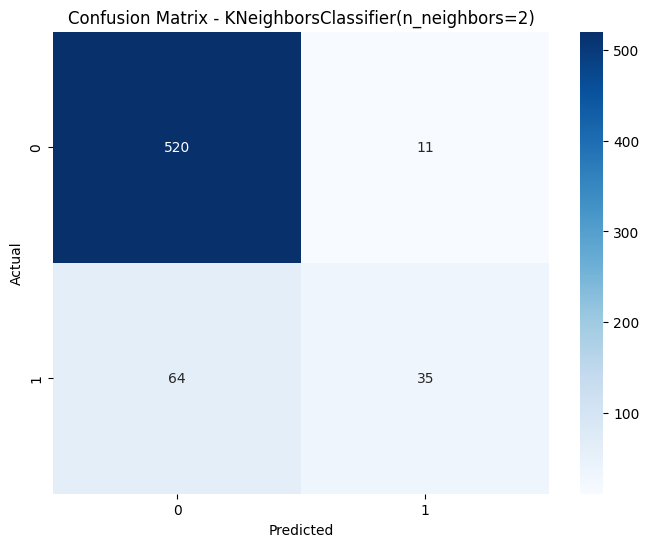

In [3]:
best_k = 1
best_score = 0

for k in range(1, 50):  # Testing k from 1 to 50
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k

print("Best k by accuracy:", best_k)

# Training final model with best k and evaluating
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f"Confusion Matrix - {knn_final}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



[INFO] creating woe binning ...


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scorecardpy\woebin.py:320: FutureWarning

[INFO] converting into woe values ...
Classification Report for Weighted KNN:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       520
           1       0.86      0.64      0.73       110

    accuracy                           0.92       630
   macro avg       0.90      0.81      0.84       630
weighted avg       0.92      0.92      0.91       630

Confusion Matrix for Weighted KNN:
[[509  11]
 [ 40  70]]


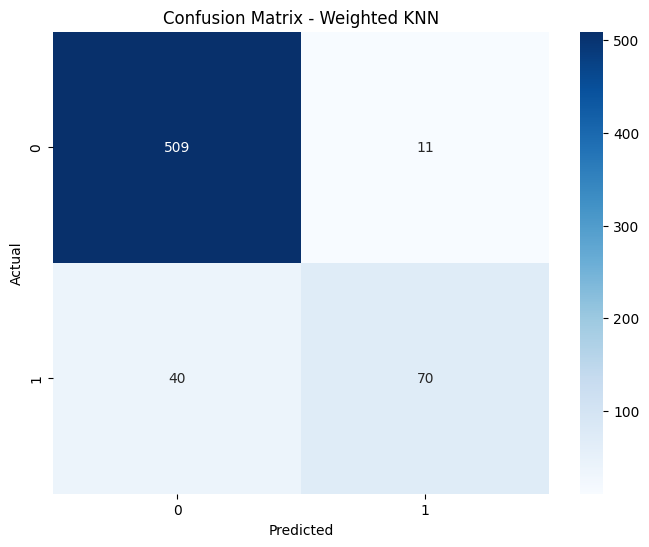

In [34]:
# Automatically take all columns except the last as features, and the last column as the target
target_variable = dataset.columns[-1]
features_to_bin = dataset.columns[:-1].tolist()

# Perform WOE binning and transformation
bins = sc.woebin(dataset, y=target_variable, x=features_to_bin)
dataset_woe = sc.woebin_ply(dataset, bins)

# Split the Data into Training and Test Sets
X = dataset_woe.drop(target_variable, axis=1)
y = dataset_woe[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the best k for KNN
best_k = 2

# Initialize and fit the weighted KNN model using the 'distance' weight metric
knn_weighted = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = knn_weighted.predict(X_test_scaled)

# Print classification report
print("Classification Report for Weighted KNN:")
print(classification_report(y_test, y_pred_weighted))

# Generate and print confusion matrix
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
print("Confusion Matrix for Weighted KNN:")
print(cm_weighted)

# Graphical representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - Weighted KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification Report for Scaled Data:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       520
           1       0.84      0.72      0.77       110

    accuracy                           0.93       630
   macro avg       0.89      0.84      0.87       630
weighted avg       0.92      0.93      0.92       630

Confusion Matrix for Scaled Data:
[[505  15]
 [ 31  79]]


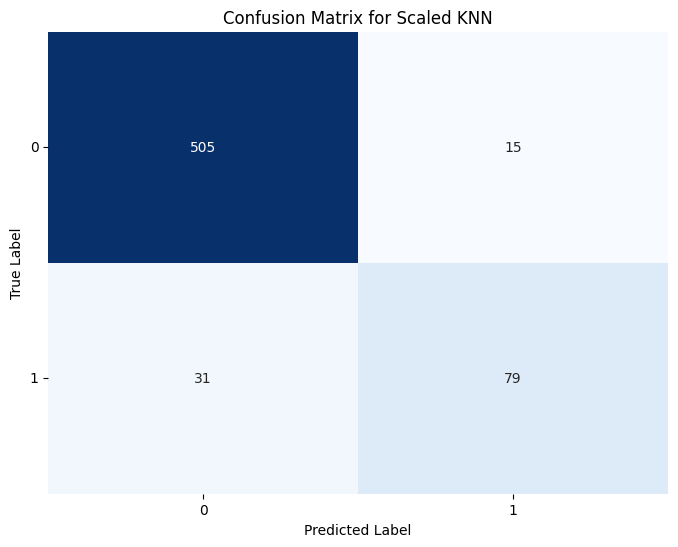

In [35]:
best_k = 3  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)

# Print classification report
print("Classification Report for Scaled Data:")
print(classification_report(y_test, y_pred_scaled))

# Print and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_scaled)
print("Confusion Matrix for Scaled Data:")
print(cm)

# Graphical representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # 'fmt' is the string formatting code to use when adding annotations.
plt.title('Confusion Matrix for Scaled KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(np.unique(y_train))) + 0.5, np.unique(y_train))
plt.yticks(np.arange(len(np.unique(y_train))) + 0.5, np.unique(y_train), rotation=0)
plt.show()


Classification Report for Weighted KNN:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       520
           1       0.86      0.64      0.73       110

    accuracy                           0.92       630
   macro avg       0.90      0.81      0.84       630
weighted avg       0.92      0.92      0.91       630

Confusion Matrix for Weighted KNN:
[[509  11]
 [ 40  70]]


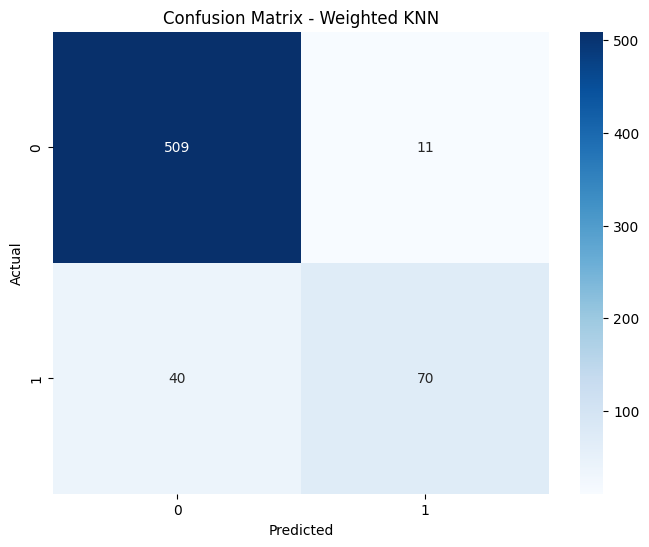

In [36]:
best_k = 2

# Initialize and fit the weighted KNN model using the 'distance' weight metric
knn_weighted = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = knn_weighted.predict(X_test_scaled)

# Print classification report
print("Classification Report for Weighted KNN:")
print(classification_report(y_test, y_pred_weighted))

# Generate and print confusion matrix
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
print("Confusion Matrix for Weighted KNN:")
print(cm_weighted)

# Graphical representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - Weighted KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Baseline KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       520
           1       0.86      0.64      0.73       110

    accuracy                           0.92       630
   macro avg       0.90      0.81      0.84       630
weighted avg       0.92      0.92      0.91       630



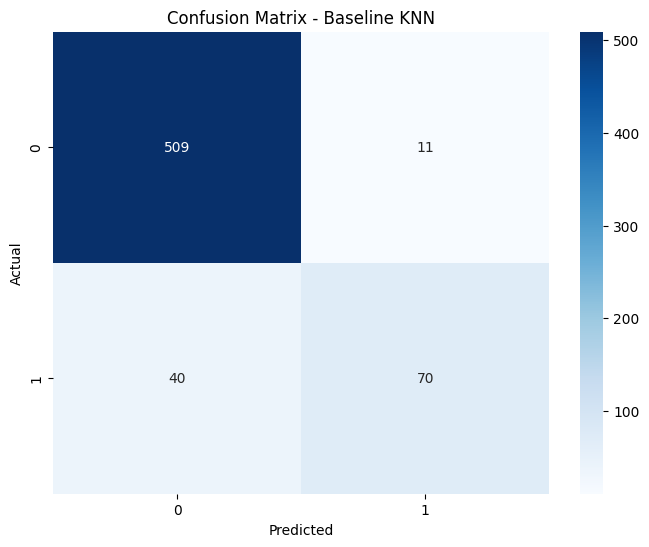


Random Oversampling Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       520
           1       0.86      0.64      0.73       110

    accuracy                           0.92       630
   macro avg       0.90      0.81      0.84       630
weighted avg       0.92      0.92      0.91       630



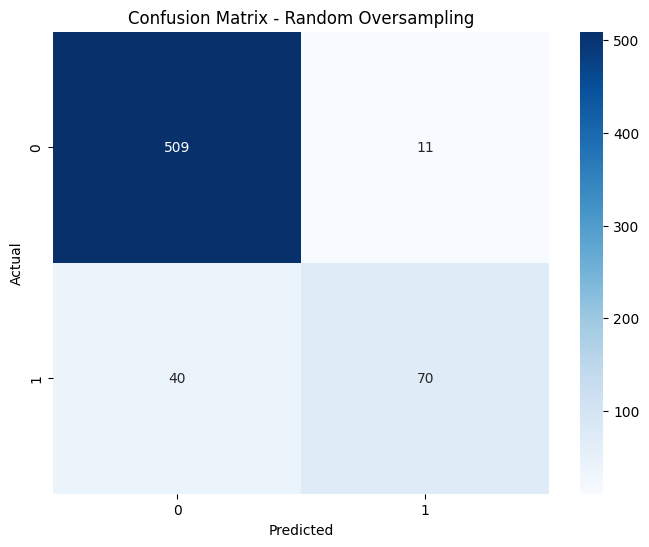


SMOTE Oversampling Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       520
           1       0.83      0.67      0.74       110

    accuracy                           0.92       630
   macro avg       0.88      0.82      0.85       630
weighted avg       0.92      0.92      0.92       630



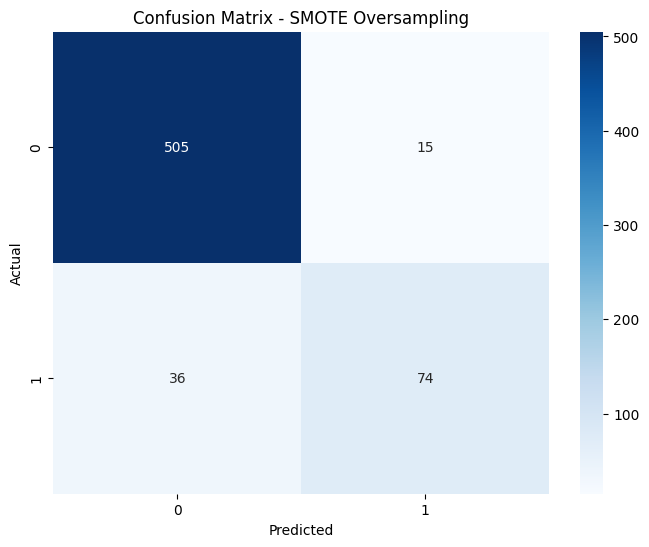


Random Undersampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       520
           1       0.70      0.85      0.77       110

    accuracy                           0.91       630
   macro avg       0.83      0.88      0.85       630
weighted avg       0.92      0.91      0.91       630



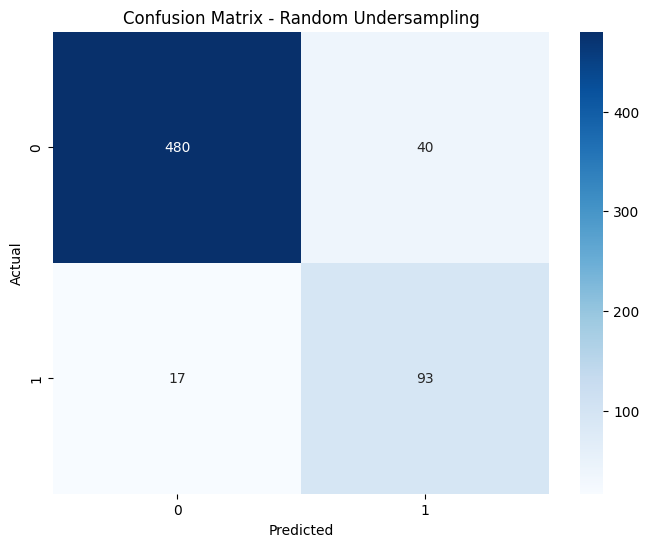


SMOTE + ENN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       520
           1       0.69      0.83      0.75       110

    accuracy                           0.90       630
   macro avg       0.83      0.87      0.85       630
weighted avg       0.91      0.90      0.91       630



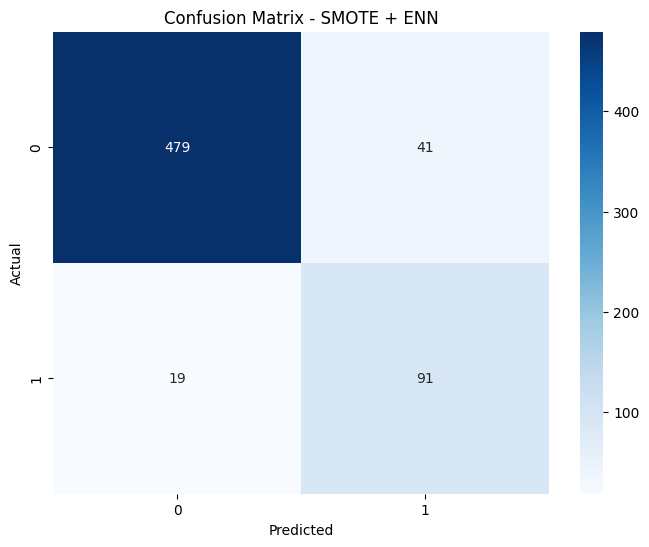


Summary of Results:
            Description  Accuracy  Precision    Recall  F1 Score
0          Baseline KNN  0.919048   0.895669  0.807605  0.842638
1   Random Oversampling  0.919048   0.895669  0.807605  0.842638
2    SMOTE Oversampling  0.919048   0.882459  0.821941  0.847825
3  Random Undersampling  0.909524   0.832521  0.884266  0.854692
4           SMOTE + ENN  0.904762   0.825621  0.874213  0.846564


In [37]:
best_k = 2

# Function to evaluate a KNN model
def evaluate_knn_model(X_train, y_train, X_test, y_test, description):
    knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Print metrics and confusion matrix
    print(f"\n{description} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.title(f"Confusion Matrix - {description}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {'Description': description, 'Accuracy': acc, 'Precision': prec, 'Recall': recall, 'F1 Score': f1}

# List to store results
results = []

# 1. Baseline KNN without any handling
results.append(evaluate_knn_model(X_train_scaled, y_train, X_test_scaled, y_test, "Baseline KNN"))

# 2. Random Oversampling
random_oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = random_oversampler.fit_resample(X_train_scaled, y_train)
results.append(evaluate_knn_model(X_train_over, y_train_over, X_test_scaled, y_test, "Random Oversampling"))

# 3. SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
results.append(evaluate_knn_model(X_train_smote, y_train_smote, X_test_scaled, y_test, "SMOTE Oversampling"))

# 4. Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)
results.append(evaluate_knn_model(X_train_under, y_train_under, X_test_scaled, y_test, "Random Undersampling"))

# 5. Combination of SMOTE and ENN (SMOTEENN)
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train_scaled, y_train)
results.append(evaluate_knn_model(X_train_smoteenn, y_train_smoteenn, X_test_scaled, y_test, "SMOTE + ENN"))

# Summarize results in a table
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)




Classification Report for Euclidean Metric KNN:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       520
           1       0.81      0.71      0.76       110

    accuracy                           0.92       630
   macro avg       0.88      0.84      0.85       630
weighted avg       0.92      0.92      0.92       630



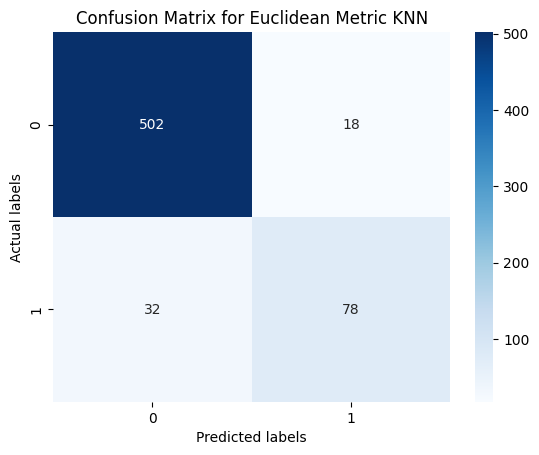


Classification Report for Manhattan Metric KNN:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.84      0.74      0.78       110

    accuracy                           0.93       630
   macro avg       0.89      0.85      0.87       630
weighted avg       0.93      0.93      0.93       630



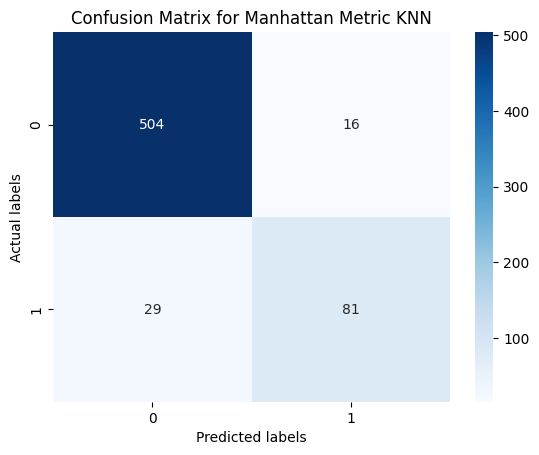


Classification Report for Chebyshev Metric KNN:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       520
           1       0.79      0.74      0.76       110

    accuracy                           0.92       630
   macro avg       0.87      0.85      0.86       630
weighted avg       0.92      0.92      0.92       630



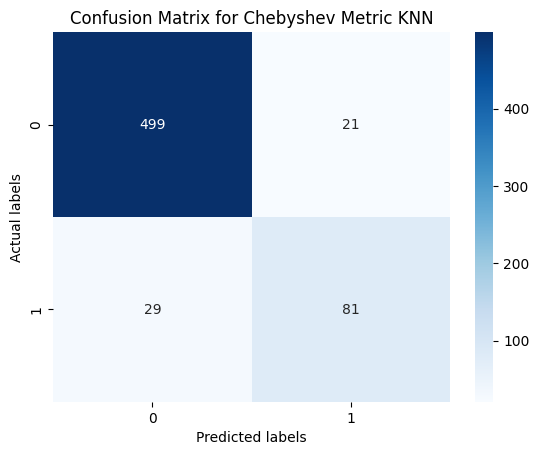


Classification Report for Minkowski Metric KNN:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       520
           1       0.81      0.71      0.76       110

    accuracy                           0.92       630
   macro avg       0.88      0.84      0.85       630
weighted avg       0.92      0.92      0.92       630



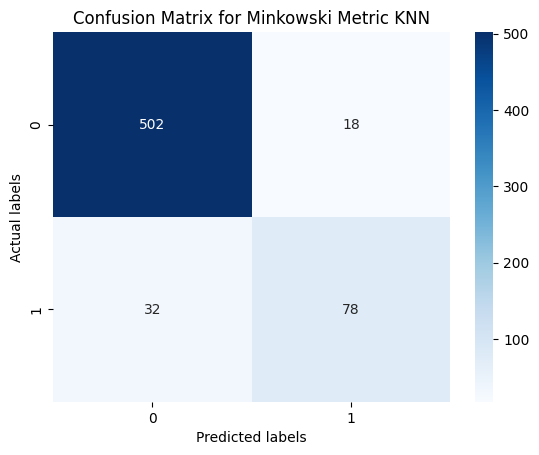


Summary of Results:
      Metric  Accuracy  Precision    Recall  F1 Score
0  euclidean  0.920635   0.876287  0.837238  0.854922
1  manhattan  0.928571   0.890321  0.852797  0.869937
2  chebyshev  0.920635   0.869597  0.847990  0.858221
3  minkowski  0.920635   0.876287  0.837238  0.854922


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are predefined
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
results = []

# Loop through each distance metric
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)  # Adjust `n_neighbors` if needed
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    # Classification Report and Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append({
        'Metric': metric,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': recall,
        'F1 Score': f1
    })

    print(f"\nClassification Report for {metric.capitalize()} Metric KNN:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix with graphical display
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix for {metric.capitalize()} Metric KNN')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('Actual labels')
    ax.xaxis.set_ticklabels(['0', '1'])  # Adjust tick labels based on class names
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()

# Summarize results in a table
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)



Best k: 7
Final KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       531
           1       0.85      0.87      0.86        99

    accuracy                           0.96       630
   macro avg       0.91      0.92      0.92       630
weighted avg       0.96      0.96      0.96       630

Final KNN Model Confusion Matrix:
[[516  15]
 [ 13  86]]


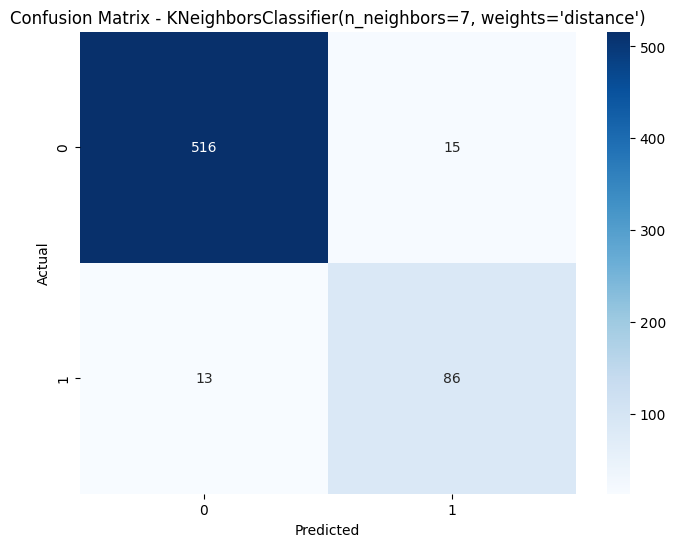

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Determine the best k using cross-validation on the training set
best_k = 1
best_score = 0

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k

print(f"Best k: {best_k}")

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train KNN with the best k and SMOTE data
knn_final = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_final.fit(X_train_smote, y_train_smote)
y_pred = knn_final.predict(X_test_scaled)

# Evaluation
print("Final KNN Model Classification Report:")
print(classification_report(y_test, y_pred))
print("Final KNN Model Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f"Confusion Matrix - {knn_final}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, KBinsDiscretizer, FunctionTransformer
)
from sklearn.metrics import classification_report, confusion_matrix
import scorecardpy as sc
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)


dataset = pd.read_csv('Customer_Churn_Modified.csv')

target_variable = dataset.columns[-1]
features = dataset.columns[:-1]

X = dataset[features]
y = dataset[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

transformations = {
    "Log Transformation": FunctionTransformer(np.log1p, validate=True), 
    "Rank Transformation": FunctionTransformer(
        lambda x: pd.DataFrame(x, columns=X_train.columns).rank(axis=0).to_numpy(), validate=True
    ),  
    "Box-Cox Transformation": PowerTransformer(method='box-cox'),
    "Z-score Standardization": StandardScaler(),
    "Discretization": KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'),  
    "WOE Transformation": "woe",  
    "Min-Max Normalization": MinMaxScaler(),
    "Robust Scaling": RobustScaler(),
}


if (X_train <= 0).any().any():
    print("Skipping Box-Cox Transformation due to non-positive values in the dataset.")
    del transformations["Box-Cox Transformation"]


results = {}

def run_knn(X_train_transformed, X_test_transformed, transformation_name):
    # Initialize and fit KNN with 5 neighbors and distance weighting
    knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
    knn.fit(X_train_transformed, y_train)
    y_pred = knn.predict(X_test_transformed)

    # Generate classification report and confusion matrix
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store the results
    results[transformation_name] = {
        "Classification Report": report,
        "Confusion Matrix": cm
    }
    print(f"\nResults for {transformation_name}:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(cm)

# Apply each transformation and run KNN
for name, transformer in transformations.items():
    if name == "WOE Transformation":
        # Perform WOE binning and transformation
        bins = sc.woebin(dataset, y=target_variable, x=list(features))
        dataset_woe = sc.woebin_ply(dataset, bins)

        # Prepare WOE-transformed training and test sets
        X_woe = dataset_woe.drop(target_variable, axis=1)
        y_woe = dataset_woe[target_variable]
        X_train_woe, X_test_woe, y_train, y_test = train_test_split(X_woe, y_woe, test_size=0.2, random_state=42)
        run_knn(X_train_woe, X_test_woe, name)
    else:
   
        transformer.fit(X_train)  
        X_train_transformed = transformer.transform(X_train)
        X_test_transformed = transformer.transform(X_test)
        run_knn(X_train_transformed, X_test_transformed, name)


print("\nSummary of Results:")
for transformation, metrics in results.items():
    print(f"\n{transformation}:")
    print(f"Accuracy: {metrics['Classification Report']['accuracy']:.4f}")
    print(f"Class 1 F1-Score: {metrics['Classification Report']['1']['f1-score']:.4f}")


Skipping Box-Cox Transformation due to non-positive values in the dataset.

Results for Log Transformation:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       520
           1       0.89      0.75      0.81       110

    accuracy                           0.94       630
   macro avg       0.92      0.86      0.89       630
weighted avg       0.94      0.94      0.94       630

Confusion Matrix:
[[510  10]
 [ 28  82]]

Results for Rank Transformation:
              precision    recall  f1-score   support

           0       0.88      0.63      0.74       520
           1       0.25      0.58      0.35       110

    accuracy                           0.63       630
   macro avg       0.56      0.61      0.54       630
weighted avg       0.77      0.63      0.67       630

Confusion Matrix:
[[330 190]
 [ 46  64]]

Results for Z-score Standardization:
              precision    recall  f1-score   support

           0       0.97      

Starting Grid Search...
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Grid Search Complete.

ALL CROSS-VALIDATION RESULTS (Sorted by mean_test_score):
                                                                                       params  mean_test_score  std_test_score  rank_test_score
 {'knn__metric': 'minkowski', 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}         0.961111        0.004274                1
 {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}         0.961111        0.004274                1
 {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'distance'}         0.961111        0.004274                1
  {'knn__metric': 'minkowski', 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}         0.958730        0.006070                4
  {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'uniform'}         0.958730  

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


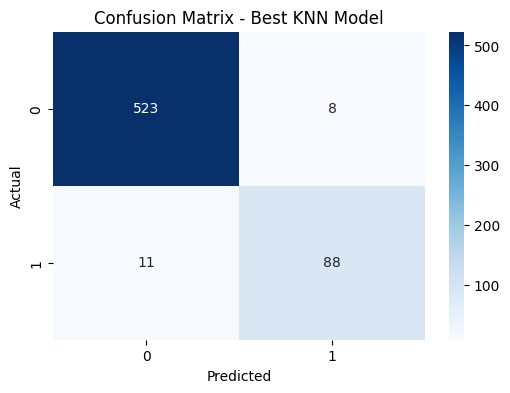

In [10]:
def main():

    df = pd.read_csv('Customer_Churn_Modified.csv')

    target_col = 'Churn' 
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y
    )

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    param_grid = {
        'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 15, 21],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
        'knn__p': [1, 2]
    }

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,         #
        n_jobs=-1,    
        verbose=1
    )

    print("Starting Grid Search...")
    grid_search.fit(X_train, y_train)
    print("Grid Search Complete.\n")

    results_df = pd.DataFrame(grid_search.cv_results_)

    cols_of_interest = [
        'params', 
        'mean_test_score', 
        'std_test_score', 
        'rank_test_score'
    ]
    sorted_results_df = results_df[cols_of_interest].sort_values(
        by='mean_test_score', 
        ascending=False
    )

    print("ALL CROSS-VALIDATION RESULTS (Sorted by mean_test_score):")
    print(sorted_results_df.to_string(index=False), "\n")

    print("BEST PARAMETERS (from cross-validation):", grid_search.best_params_)
    print("BEST CV ACCURACY:", grid_search.best_score_, "\n")

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    test_accuracy = accuracy_score(y_test, y_pred)
    print("TEST ACCURACY (Best Model):", test_accuracy, "\n")

    print("CONFUSION MATRIX (Best Model):")
    print(confusion_matrix(y_test, y_pred), "\n")

    print("CLASSIFICATION REPORT (Best Model):")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        fmt="d",
        cmap="Blues"
    )
    plt.title("Confusion Matrix - Best KNN Model")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


if __name__ == "__main__":
    main()
